In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

*1. Understanding the problem space*

**orders**

In [3]:
orders = pd.read_parquet('/home/alvaro/groceries/orders.parquet')
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [4]:
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


El índice del dataset se salta números y no se corresponde con el número de filas por alguna razón

In [5]:
orders.user_order_seq.describe()

count    8773.000000
mean        2.445116
std         2.707693
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        25.000000
Name: user_order_seq, dtype: float64

<Axes: >

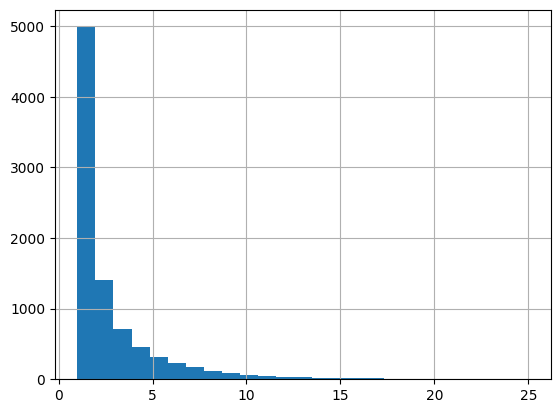

In [6]:
orders.user_order_seq.hist(bins=25)

La mayoría de usuarios compran una vez, y el numero de usuarios va disminuyendo según el número de compras por usuario aumenta

<Axes: >

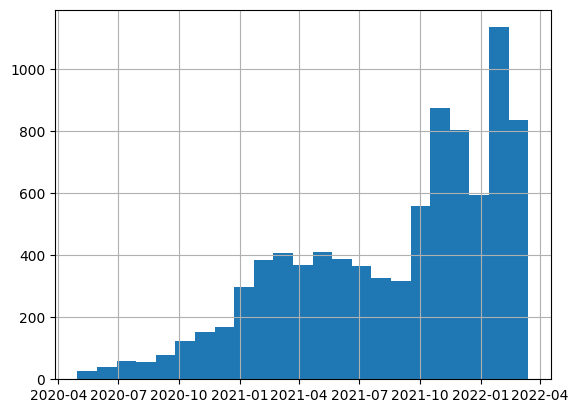

In [7]:
orders.order_date.hist(bins=23)

El número de órdenes aumenta a medida que avanza el tiempo

In [8]:
# crear una columna con el número de elementos en cada compra
orders['ordered_items_count'] = orders['ordered_items'].apply(lambda x: len(x))
orders.ordered_items_count.describe()

count    8773.000000
mean       12.305711
std         6.839507
min         1.000000
25%         8.000000
50%        11.000000
75%        15.000000
max       114.000000
Name: ordered_items_count, dtype: float64

<Axes: >

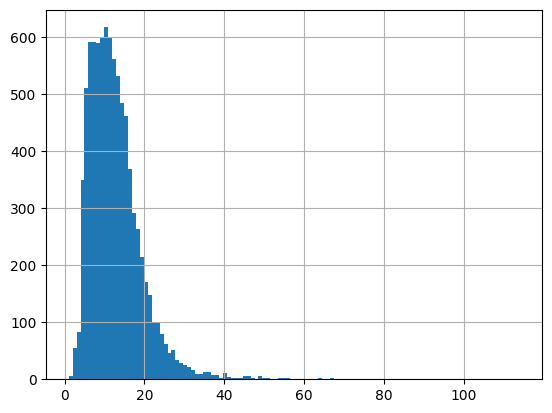

In [9]:
orders.ordered_items_count.hist(bins=114)

La mayoría de órdenes contienen alrededor de 15 elementos, con una cola larga en la distribución que llega a 114

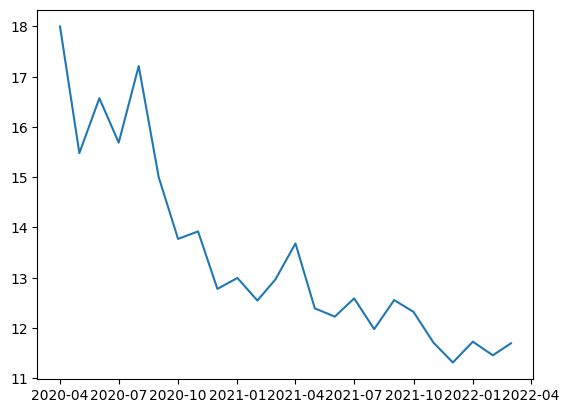

In [10]:
monthly_items = orders.groupby(orders['order_date'].dt.to_period('M'))['ordered_items_count'].mean().reset_index()
monthly_items['order_date'] = monthly_items['order_date'].dt.to_timestamp()
plt.plot(monthly_items['order_date'],monthly_items['ordered_items_count'])

El número de elementos por cada compra baja con el tiempo

**regulars**

In [11]:
regulars = pd.read_parquet('/home/alvaro/groceries/regulars.parquet')
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


<Axes: >

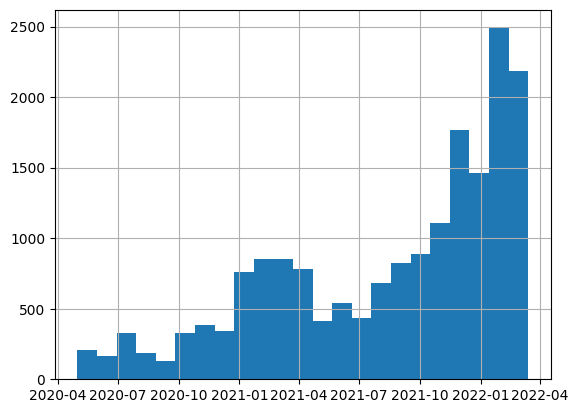

In [12]:
regulars.created_at.hist(bins=23)

La evolución de compras regulares se corresponde con la distribución de compras en general

**abandoned_carts**

In [13]:
abandoned = pd.read_parquet('/home/alvaro/groceries/abandoned_carts.parquet')
abandoned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


In [14]:
abandoned.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


In [15]:
abandoned['num_abandoned'] = abandoned['variant_id'].apply(lambda x: len(x))
abandoned.head()


,id,user_id,created_at,variant_id,num_abandoned
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762...",19
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326...",9
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088...",20
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397...",13
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]",3


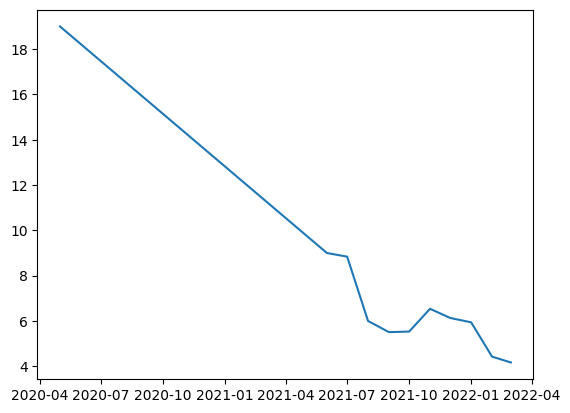

In [16]:
monthly_abandoned = abandoned.groupby(abandoned['created_at'].dt.to_period('M'))['num_abandoned'].mean().reset_index()
monthly_abandoned['created_at'] = monthly_abandoned['created_at'].dt.to_timestamp()
plt.plot(monthly_abandoned['created_at'],monthly_abandoned['num_abandoned'])

El número de elementos que se abandonan en cada carrito ha disminuido con el tiempo al igual que el número de elementos comprados

**users**

In [17]:
users = pd.read_parquet('/home/alvaro/groceries/users.parquet')
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [18]:
users.describe()

,count_people,count_adults,count_children,count_babies,count_pets
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2.787692,2.003077,0.707692,0.076923,0.636923
std,1.365753,0.869577,1.026246,0.289086,0.995603
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000
75%,4.000000,2.000000,1.000000,0.000000,1.000000
max,8.000000,7.000000,6.000000,2.000000,6.000000


In [19]:
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


user_nuts1 (la región) tiene varios valores nan que podrían imputarse por los valores más comunes

Los counts de clientes tienen muchos valores nan. Podría tener sentido imputarlos por 0 o crear una columna que indique si los clientes han sido contados o no

In [20]:
# Cantidad de usuarios de cada región
nuts_1_notna=users.user_nuts1.value_counts()
nuts_1_notna

user_nuts1
UKI    1318
UKJ     745
UKK     602
UKH     414
UKD     358
UKM     315
UKE     303
UKG     295
UKF     252
UKL     224
UKC     102
UKN       4
Name: count, dtype: int64

In [21]:
# imputar valores nulos
users['user_nuts1'] = users['user_nuts1'].fillna('UKI')

In [22]:
# calcular la proporción de valores nulos para count_people cada mes
proporcion_nan = users.groupby('customer_cohort_month')['count_people'].apply(lambda x: x.isna().mean()).reset_index()
print(proporcion_nan)

   customer_cohort_month  count_people
0    2020-04-01 00:00:00      0.000000
1    2020-05-01 00:00:00      0.181818
2    2020-06-01 00:00:00      0.028571
3    2020-07-01 00:00:00      0.023810
4    2020-08-01 00:00:00      0.315789
5    2020-09-01 00:00:00      0.838235
6    2020-10-01 00:00:00      0.965909
7    2020-11-01 00:00:00      0.928571
8    2020-12-01 00:00:00      0.981651
9    2021-01-01 00:00:00      0.996324
10   2021-02-01 00:00:00      0.995455
11   2021-03-01 00:00:00      0.975610
12   2021-04-01 00:00:00      0.829268
13   2021-05-01 00:00:00      0.910180
14   2021-06-01 00:00:00      0.902703
15   2021-07-01 00:00:00      0.938462
16   2021-08-01 00:00:00      0.959677
17   2021-09-01 00:00:00      0.944444
18   2021-10-01 00:00:00      0.962525
19   2021-11-01 00:00:00      0.973396
20   2021-12-01 00:00:00      0.975771
21   2022-01-01 00:00:00      0.968023
22   2022-02-01 00:00:00      0.969697
23   2022-03-01 00:00:00      0.972789


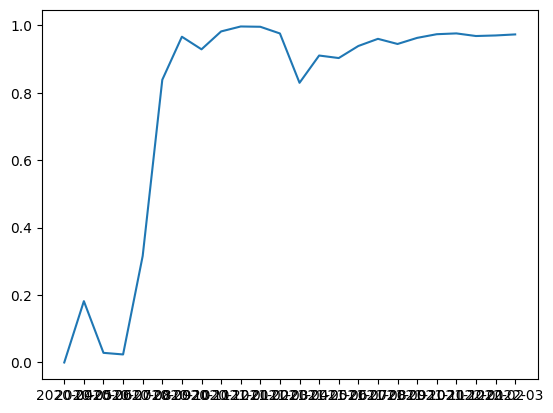

In [24]:
proporcion_nan['customer_cohort_month'] = pd.to_datetime(proporcion_nan['customer_cohort_month'])
plt.plot(proporcion_nan.customer_cohort_month.dt.strftime('%Y-%m'),proporcion_nan.count_people)

Conforme avanza el tiempo cuentan menos a los clientes

In [25]:
users = users.assign(people_isna = users.count_people.isna())
orders_counted_users = orders.merge(users[['user_id','people_isna']], on='user_id',how='left')

<Axes: xlabel='people_isna'>

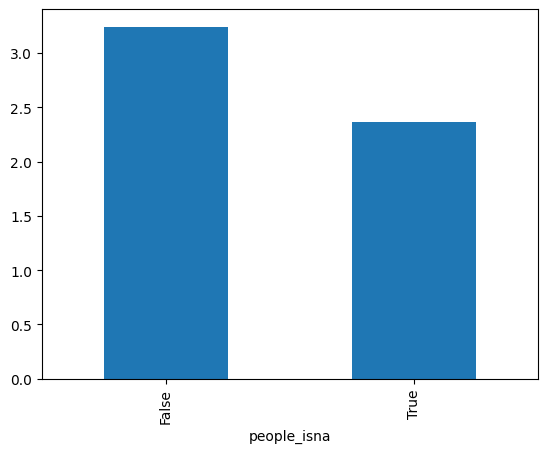

In [26]:
orders_counted_users.groupby('people_isna')['user_order_seq'].mean().plot(kind='bar')

Los usuarios que han sido contados han comprado más veces de media

<Axes: >

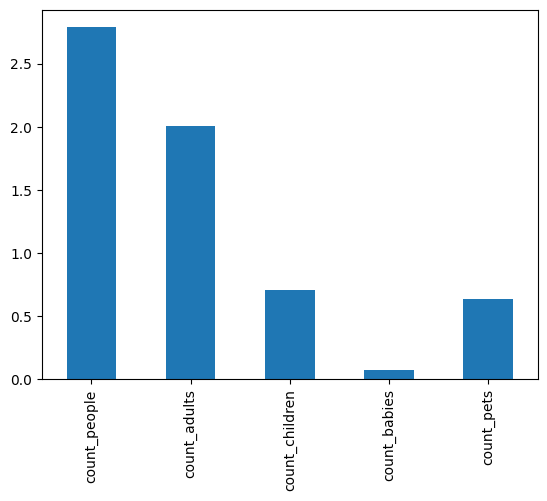

In [27]:
users[['count_people','count_adults','count_children','count_babies','count_pets']].mean().plot(kind='bar')

In [28]:
users.user_segment.unique()

array(['Top Up', 'Proposition'], dtype=object)

In [29]:
users.user_segment.value_counts()

user_segment
Top Up         2643
Proposition    2340
Name: count, dtype: int64

<Axes: xlabel='customer_cohort_month'>

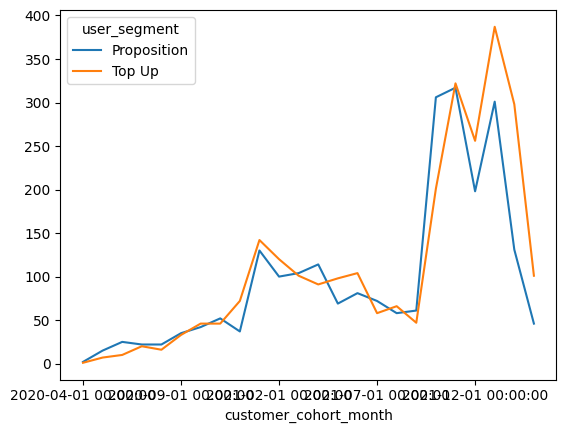

In [30]:
users.groupby('customer_cohort_month').user_segment.value_counts().unstack().plot(kind='line')

<Axes: xlabel='user_nuts1'>

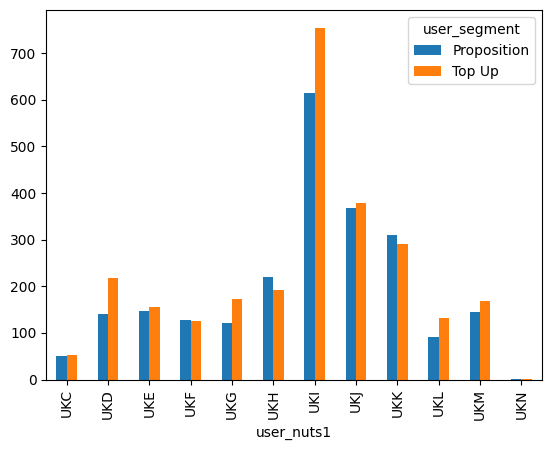

In [31]:
users.groupby('user_nuts1').user_segment.value_counts().unstack().plot(kind='bar')


Hay leves diferencias por región entre los segmentos 'proposition' y 'top up'

In [32]:
n_regulars = regulars.groupby('user_id').variant_id.nunique().rename('n_regulars')
users_regulars = users.merge(n_regulars, on='user_id',how='left').fillna(0)

<Axes: xlabel='user_segment'>

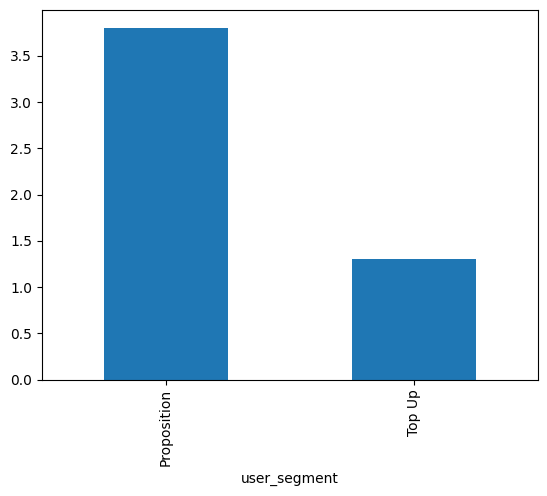

In [33]:
users_regulars.groupby('user_segment').n_regulars.mean().plot(kind='bar')

Los usuarios 'proposition' tienen un número bastante mayor de regulars

**inventory**

In [34]:
inventory = pd.read_parquet('/home/alvaro/groceries/inventory.parquet')
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [35]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [36]:
ordered_items = orders.explode('ordered_items').rename({'ordered_items':'variant_id'}, axis=1)
ordered_items = ordered_items.merge(inventory,on='variant_id',how='left')

In [37]:
ordered_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107958 entries, 0 to 107957
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   107958 non-null  int64         
 1   user_id              107958 non-null  object        
 2   created_at           107958 non-null  datetime64[us]
 3   order_date           107958 non-null  datetime64[us]
 4   user_order_seq       107958 non-null  int64         
 5   variant_id           107958 non-null  object        
 6   ordered_items_count  107958 non-null  int64         
 7   price                92361 non-null   float64       
 8   compare_at_price     92361 non-null   float64       
 9   vendor               92361 non-null   object        
 10  product_type         92361 non-null   object        
 11  tags                 92361 non-null   object        
dtypes: datetime64[us](2), float64(2), int64(3), object(5)
memory usage: 9.9+

In [38]:
inventory_orders = ordered_items.loc[ordered_items.price.notna(),['variant_id','order_date']]
inventory_monthly_items = inventory_orders.groupby(inventory_orders['order_date'].dt.to_period('M')).variant_id.count().reset_index()
inventory_monthly_items['order_date'] = inventory_monthly_items['order_date'].dt.to_timestamp()

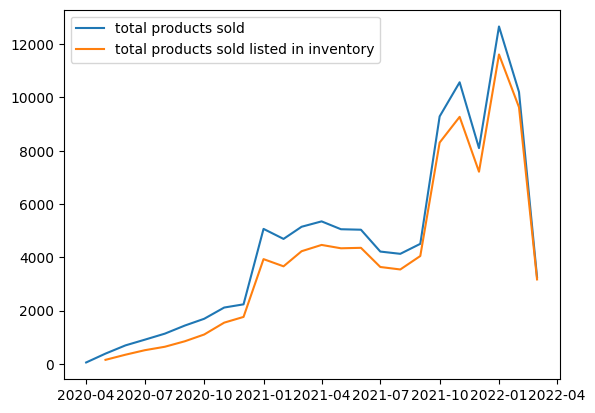

In [39]:
monthly_items = ordered_items.groupby(ordered_items['order_date'].dt.to_period('M'))['variant_id'].count().reset_index()
monthly_items['order_date'] = monthly_items['order_date'].dt.to_timestamp()

plt.plot(monthly_items['order_date'],monthly_items['variant_id'],label='total products sold')
plt.plot(inventory_monthly_items['order_date'],inventory_monthly_items['variant_id'],label='total products sold listed in inventory')
plt.legend()

Varios productos fueron pedidos pero no aparecen en el inventario. Se debe a que el inventario sólo incluye los productos que actualmente se venden por lo que algunos productos fueron deslistados en algún momento. Esto puede ser un obstáculo para analizar el dataset

In [40]:
ordered_items.groupby('id').price.sum().describe()

count    8773.000000
mean       55.832173
std        24.316070
min         0.000000
25%        44.250000
50%        51.860000
75%        60.590000
max       319.800000
Name: price, dtype: float64

<Axes: xlabel='order_date'>

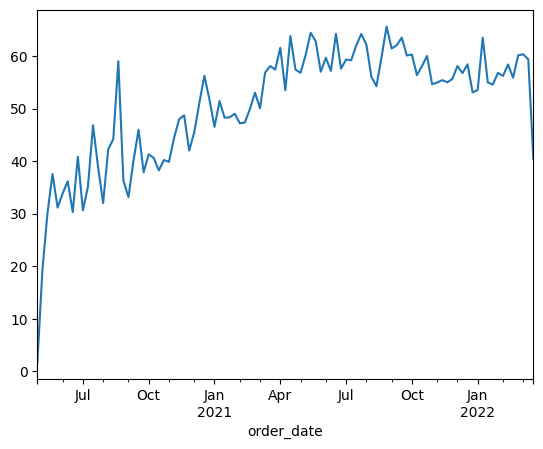

In [41]:
orders_size = ordered_items.groupby(['id','order_date'])['price'].sum().reset_index()
orders_size.groupby(pd.Grouper(key='order_date',freq='W'))['price'].mean().plot()

El precio medio de cada orden ha subido, aunque no se está teniendo en cuenta el precio de los productos que han sido deslistados del inventario, por lo que esto podría no ser así. El precio medio por compra es de unos 50 euros

<Axes: xlabel='product_type'>

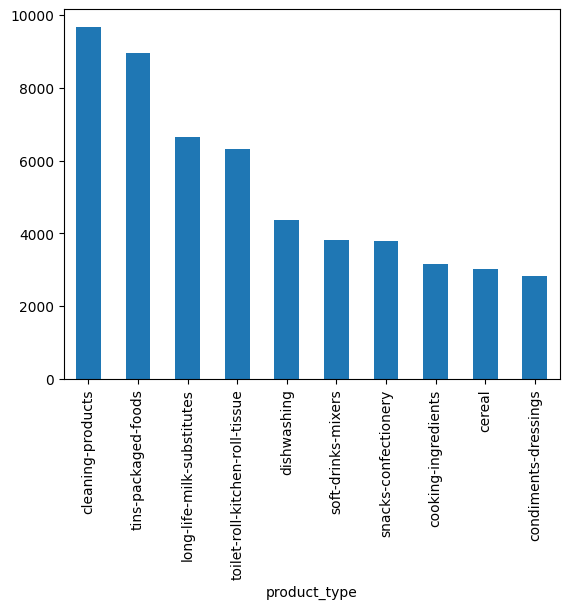

In [42]:
top_types = ordered_items.groupby('product_type').id.count().sort_values(ascending=False).head(10)
top_types.plot(kind='bar')

<Axes: xlabel='product_type'>

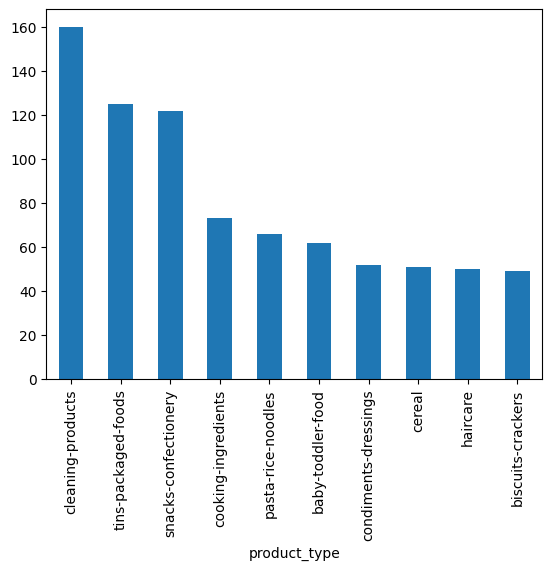

In [43]:
inventory.groupby('product_type').variant_id.count().sort_values(ascending=False).head(10).plot(kind='bar')

In [44]:
top_products = ordered_items.groupby('variant_id').id.count().sort_values(ascending=False).head()
top_products

variant_id
34081589887108    4487
39284117930116    2658
34137590366340    1459
34081331970180    1170
34284951863428    1133
Name: id, dtype: int64

In [45]:
inventory.loc[inventory.variant_id.isin(top_products.index),:]

,variant_id,price,compare_at_price,vendor,product_type,tags
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"


Diversos productos de limpieza, la comida enlatada y los sustitutos lácteos son los tipos de productos más vendidos. Tres de los cinco productos más vendidos ya no están en el inventario

/tmp/ipykernel_73906/3947819905.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_cohort_stats)


Text(0, 0.5, 'Retention rate')

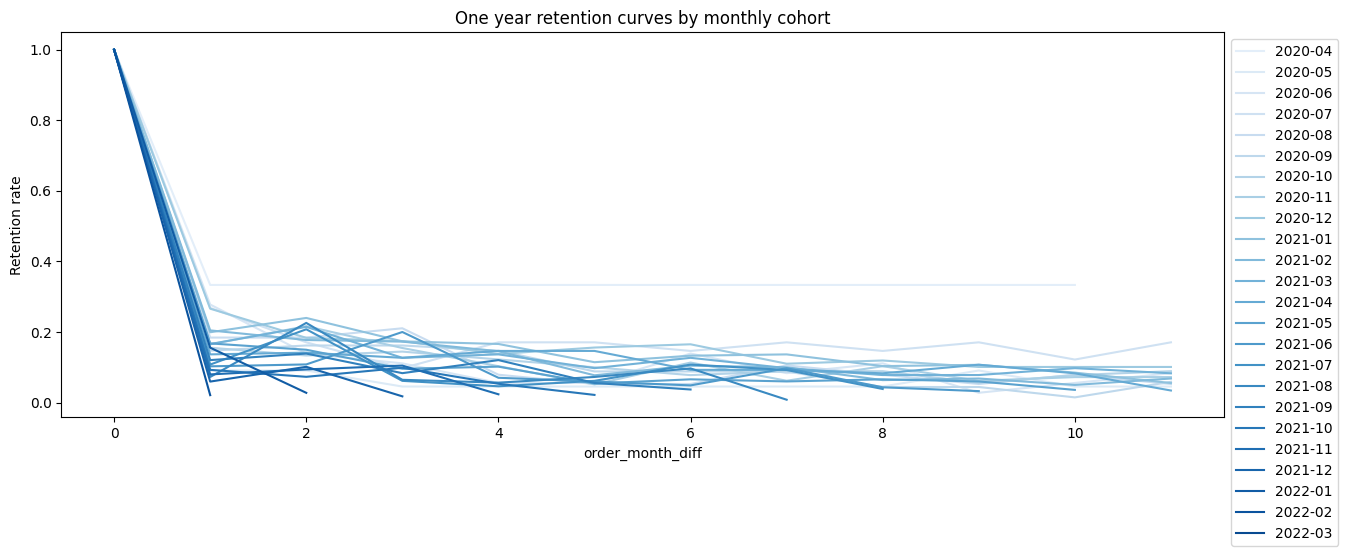

In [46]:
def compute_cohort_stats(x):
    cohort_size = x.loc[lambda x: x.order_month_diff == 0, 'user_id'].nunique()
    return (x.groupby('order_month_diff')['user_id'].nunique() / cohort_size).rename(
        'retention_rate'
    )

fig, ax = plt.subplots(figsize=[15,5])

retention_curves = (
    orders.assign(
        first_order_month = lambda x: x.groupby('user_id')['order_date']
        .transform('min')
        .dt.to_period('M')
    )
    .assign(order_month=lambda x: x.order_date.dt.to_period('M'))
    .assign(
        order_month_diff=lambda x: (x.order_month - x.first_order_month).apply(
            lambda x: x.n
        )
    )
    .groupby('first_order_month')
    .apply(compute_cohort_stats)
    .reset_index()
)

colors = plt.cm.Blues(
    np.linspace(0.1, 0.9, retention_curves.first_order_month.nunique())
)
count = 0
for label, df in retention_curves.groupby('first_order_month'):
    df.loc[lambda x: x.order_month_diff < 12].plot(
        x='order_month_diff',
        y='retention_rate',
        ax=ax,
        label=label,
        color=colors[count]
    )
    count+=1

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.title('One year retention curves by monthly cohort')
plt.ylabel('Retention rate')

**OBSERVACIONES**

- Usuarios clasificados en dos categorías que se diferencian principalmente por el número de productos en su lista de regulares.
- Información sobre la unidad familiar de algunos de los clientes.

- El número de compras ha aumentado mientras que el número de productos en cada cesta de la compra ha disminuido: ha habido un cambio en el comportamiento de compra.
- Muchos productos se han descontinuado del inventario por lo que faltan datos sobre compras pasadas.
- Precio medio de compra de unos 50 euros. Aparentemente ha subido respecto al inicio pero no se puede saber a causa de los productos que fueron comprados en el pasado que no aparecen en el inventario.
- Los productos que más se venden son los de limpieza, junto a comida envasada y sustitutivos de la leche. El más vendido con diferencia es la leche de avena oatly. Algunos de los productos más vendidos ya no están en el inventario.

- La retención de clientes es mejor para cohortes pasadas. Cerca del 30% de los usuarios de la primera cohorte han sido preservados hasta las últimas fechas del dataset, mientras que las últimas cohortes prácticamente no han vuelto a comprar tras su primer mes.

*2. Exploratory Data Analysis*

In [47]:
boxbuilder = pd.read_csv('/home/alvaro/groceries/feature_frame.csv')
boxbuilder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547128 entries, 0 to 1547127
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   variant_id                        1547128 non-null  int64  
 1   product_type                      1547128 non-null  object 
 2   order_id                          1547128 non-null  int64  
 3   user_id                           1547128 non-null  int64  
 4   created_at                        1547128 non-null  object 
 5   order_date                        1547128 non-null  object 
 6   user_order_seq                    1547128 non-null  int64  
 7   outcome                           1547128 non-null  float64
 8   ordered_before                    1547128 non-null  float64
 9   abandoned_before                  1547128 non-null  float64
 10  active_snoozed                    1547128 non-null  float64
 11  set_as_regular                    154

Las fechas no están en formato datetime. Hay un valor nulo en algunas de las columnas.

In [48]:
# convertir fechas a datetime
boxbuilder.created_at = pd.to_datetime(boxbuilder.created_at)
boxbuilder.order_date = pd.to_datetime(boxbuilder.order_date,format='%Y-%m-%d %H:%M:%S')
boxbuilder.dtypes

variant_id                                   int64
product_type                                object
order_id                                     int64
user_id                                      int64
created_at                          datetime64[ns]
order_date                          datetime64[ns]
user_order_seq                               int64
outcome                                    float64
ordered_before                             float64
abandoned_before                           float64
active_snoozed                             float64
set_as_regular                             float64
normalised_price                           float64
discount_pct                               float64
vendor                                      object
global_popularity                          float64
count_adults                               float64
count_children                             float64
count_babies                               float64
count_pets                     

In [49]:
boxbuilder.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [50]:
boxbuilder[boxbuilder.vendor.isna()]

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
1547127,33719430283396,facialskincare,2917177655428,3904236028036,2021-02-08 14:50:24,2021-02-08,2,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Al estar todos los valores nulos en una sola fila puede que no merezca la pena averiguar cómo imputar cada uno de ellos

In [51]:
boxbuilder=boxbuilder.dropna()

In [52]:
boxbuilder.outcome.value_counts()

outcome
0.0    1521308
1.0      25819
Name: count, dtype: int64

In [78]:
cols_binarias=pd.DataFrame()
for col in boxbuilder.columns:
    if set (boxbuilder[col].unique()).issubset({0, 1}):
        cols_binarias[col] = boxbuilder[col]
cols_binarias.columns

Index(['outcome', 'ordered_before', 'abandoned_before', 'active_snoozed',
       'set_as_regular', 'count_babies'],
      dtype='object')

In [80]:
cols_binarias = cols_binarias.drop(['outcome','count_babies'],axis=1)
for col in cols_binarias:
    print(f'{col}')
    print(f'Value counts: {boxbuilder[col].value_counts().to_dict()}')
    print(f'Outcome medio: {boxbuilder.groupby(col)["outcome"].mean().to_dict()}')
    print('\n')


ordered_before
Value counts: {0.0: 1501121, 1.0: 46006}
Outcome medio: {0.0: 0.01168926422320386, 1.0: 0.17980263443898623}


abandoned_before
Value counts: {0.0: 1545782, 1.0: 1345}
Outcome medio: {0.0: 0.01606759556004663, 1.0: 0.7301115241635687}


active_snoozed
Value counts: {0.0: 1542280, 1.0: 4847}
Outcome medio: {0.0: 0.0163465777939155, 1.0: 0.1254384155147514}


set_as_regular
Value counts: {0.0: 1538924, 1.0: 8203}
Outcome medio: {0.0: 0.015352934907766725, 1.0: 0.26721931000853344}




Todas las columnas binarias tienen un outcome medio superior cuando su valor es igual a 1. Esto quiere decir que cuando el usuario ha interactuado anteriormente con el producto es más probable que lo compre. Como la frecuencia de valores igual a 1 en estas variables es bastante baja, se podrían combinar todas ellas en una única columna.

In [81]:
cols_numericas = boxbuilder.select_dtypes(include=['float']).drop(cols_binarias,axis=1)
cols_numericas.describe()

,outcome,normalised_price,discount_pct,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06,1.547127e+06
mean,1.668835e-02,1.070403e-01,1.817481e-01,1.550771e-02,2.017721e+00,5.498062e-02,3.580184e-03,5.146378e-02,2.072702e+00,3.318216e+01,3.497072e+01,2.687895e+01,3.173823e+01,3.093761e+01,2.605230e+01
std,1.281010e-01,1.012933e-01,2.045323e-01,2.051363e-02,2.101152e-01,3.275417e-01,5.972746e-02,3.017916e-01,3.946277e-01,4.416048e+00,8.679242e+00,6.099032e+00,1.346131e+01,3.557168e+00,2.623210e+00
min,0.000000e+00,2.141502e-02,1.669449e-03,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.509980e+00,0.000000e+00,7.000000e+00,5.338093e+00
25%,0.000000e+00,5.123340e-02,7.159905e-02,4.842615e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.439688e+01,3.000000e+01,2.900000e+01,2.427618e+01
50%,0.000000e+00,7.834101e-02,1.135857e-01,1.063830e-02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.806743e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,0.000000e+00,1.135809e-01,2.008032e-01,2.027027e-02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.900000e+01,3.072716e+01,3.000000e+01,3.300000e+01,2.793528e+01
max,1.000000e+00,8.807265e-01,1.325301e+00,4.254386e-01,5.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,6.400000e+01,4.234402e+01,1.480000e+02,3.950000e+01,3.183274e+01


<Axes: >

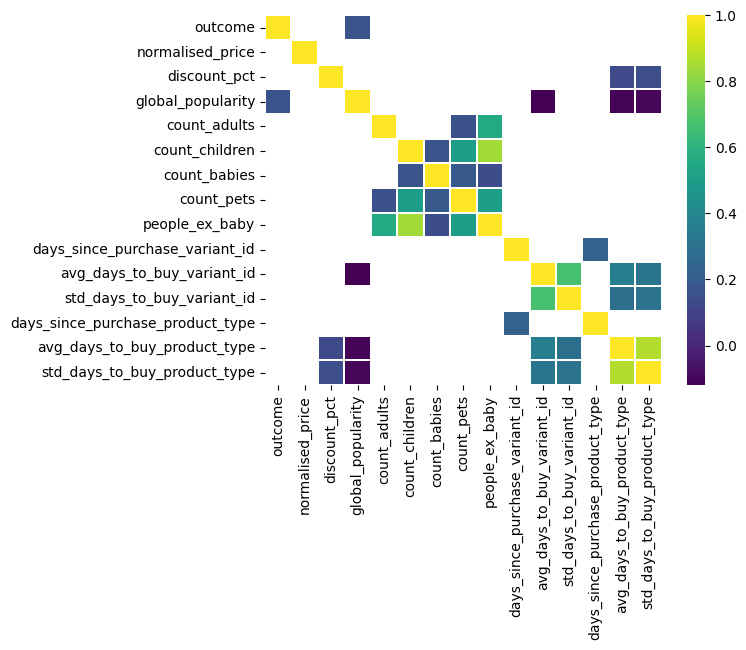

In [100]:
cols_numericas['outcome'] = boxbuilder['outcome']
corr = cols_numericas.corr()
sns.heatmap(corr[(corr >= 0.1)| (corr <= -0.1)],cmap='viridis',linewidths=0.1)

Correlaciones notables entre las variables que tienen que ver con la unidad familiar. 'avg' y 'std days to buy' también tienen cierta correlación entre sí. 

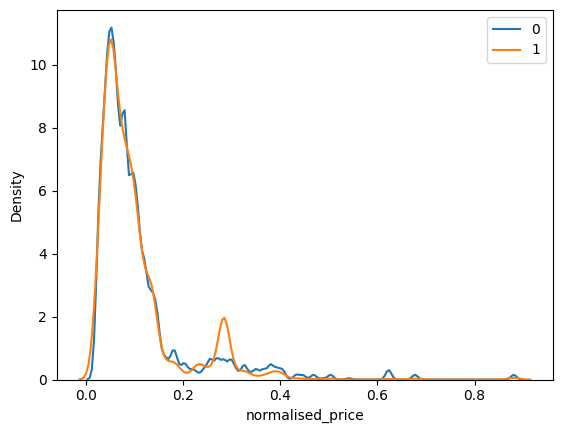

In [69]:
col = 'normalised_price'
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 0, col], label='0')
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 1, col], label='1')
plt.legend()

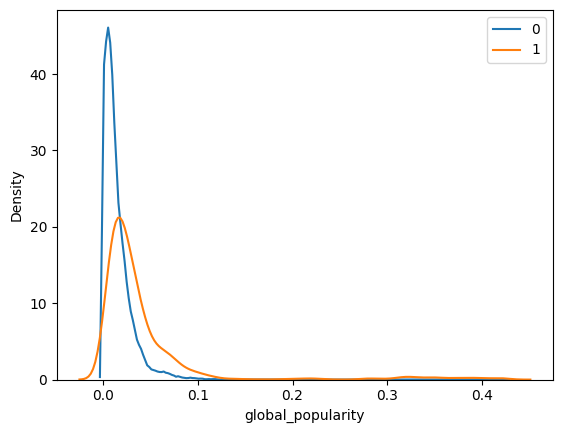

In [70]:
col = 'global_popularity'
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 0, col], label='0')
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 1, col], label='1')
plt.legend()

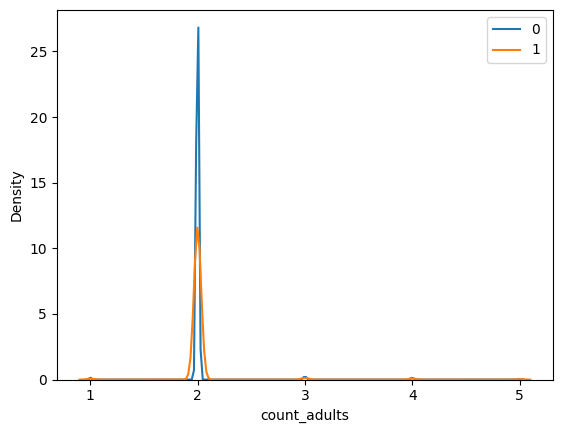

In [82]:
col = 'count_adults'
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 0, col], label='0')
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 1, col], label='1')
plt.legend()

Parece ser que en este dataset han imputado los valores nulos de las variables 'count people' por un único valor, alterando la distribución.

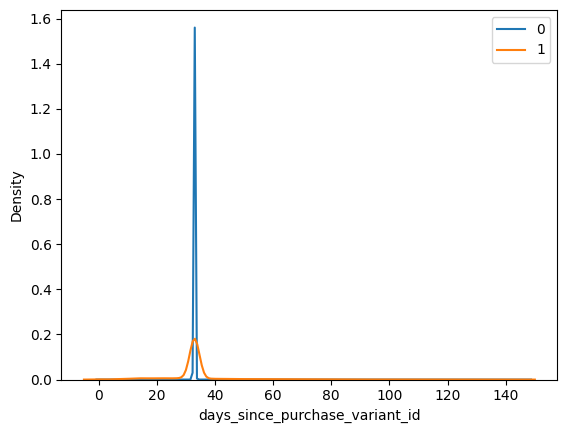

In [ ]:
col = 'days_since_purchase_variant_id'
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 0, col], label='0')
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 1, col], label='1')
plt.legend()

Casi todas las filas de esta columna tienen el mismo valor.

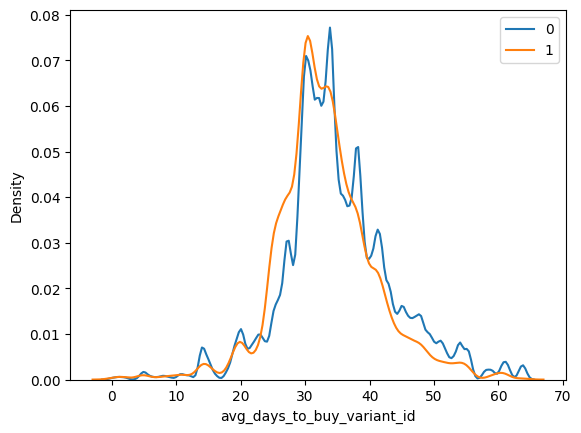

In [84]:
col = 'avg_days_to_buy_variant_id'
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 0, col], label='0')
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 1, col], label='1')
plt.legend()

In [88]:
cols_categoricas = boxbuilder.select_dtypes(include=['object'])
cols_categoricas.nunique()

product_type     53
vendor          183
dtype: int64

Muchas categorías de vendedores y tipos de productos, una opción es hacer frequency encoding

In [89]:
# Frequency encoding
for col in cols_categoricas.columns: 
    frequency_map = boxbuilder[col].value_counts(normalize=True).to_dict()
    boxbuilder[f'{col}_freq_encoded'] = boxbuilder[col].map(frequency_map)

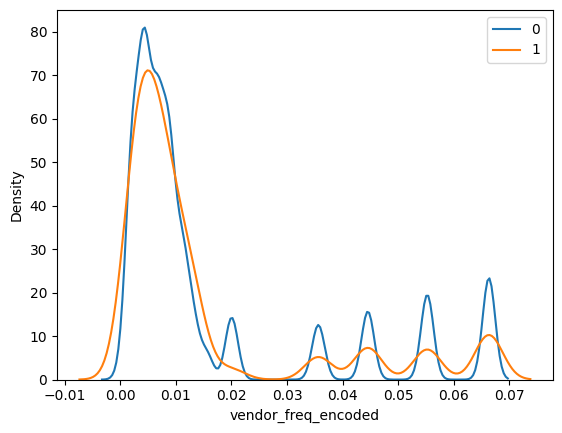

In [90]:
col = 'vendor_freq_encoded'
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 0, col], label='0')
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 1, col], label='1')
plt.legend()

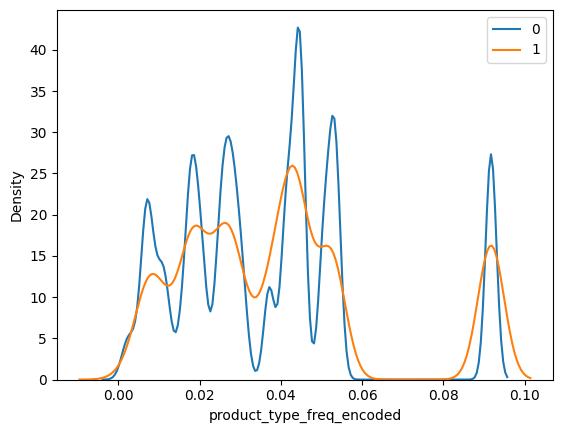

In [91]:
col = 'product_type_freq_encoded'
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 0, col], label='0')
sns.kdeplot(boxbuilder.loc[lambda x: x.outcome == 1, col], label='1')
plt.legend()

**OBSERVACIONES**

- La variable objetivo tiene un valor igual a uno en una muy pequeña proporción de las filas.
- Hay varias columnas que indican si el usuario ha interactuado previamente con el procucto de varias formas. Estas se podrían juntar en una única columna.
- Las variables categóricas tienen una alta cardinalidad, por lo que es razonable codificarlas por frecuencia.
- Hay ciertas correlaciones entre algunas de las variables. En la fase de desarrollo del modelo podría probarse a deshacerse de algunas o combinarlas para reducir la dimensionalidad.
- Algunas distribuciones de variables parecen haber sido alteradas por la imputación de valores nulos. En la fase de desarrollo podría comprobarse si esto perjudica al modelo.